<a href="https://colab.research.google.com/github/lumigraph/AP2018/blob/master/image_classify_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

import matplotlib.pylab as plt
import numpy as np

import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
data_dir = "/content/gdrive/MyDrive/data/"
batch_size = 32
img_height = 180
img_width = 180


In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 573 files belonging to 30 classes.
Using 459 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 573 files belonging to 30 classes.
Using 114 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['11st_1080x2220', '11st_1080x2280', '11st_1440x2960', '11st_1440x3040', '11st_720x1480', 'AUCTION_1080x2220', 'AUCTION_1080x2280', 'AUCTION_1440x2960', 'AUCTION_1440x3040', 'AUCTION_720x1480', 'CUPANG_1920x1080', 'CUPANG_2160x1080', 'CUPANG_2220x1080', 'CUPANG_2340X1080', 'CUPANG_3120x1440', 'GMARKET_2340x1080', 'GMARKET_3120x1440', 'GSSHOP_1080x2220', 'GSSHOP_1080x2280', 'GSSHOP_1440x2960', 'GSSHOP_1440x3040', 'GSSHOP_720x1480', 'HMAL_1480x720', 'HMAL_1668x2224', 'HMAL_2220x1080', 'HMAL_2960x1440', 'MUSINSA_1480x720', 'MUSINSA_1668x2224', 'MUSINSA_2220x1080', 'MUSINSA_2960x1440']


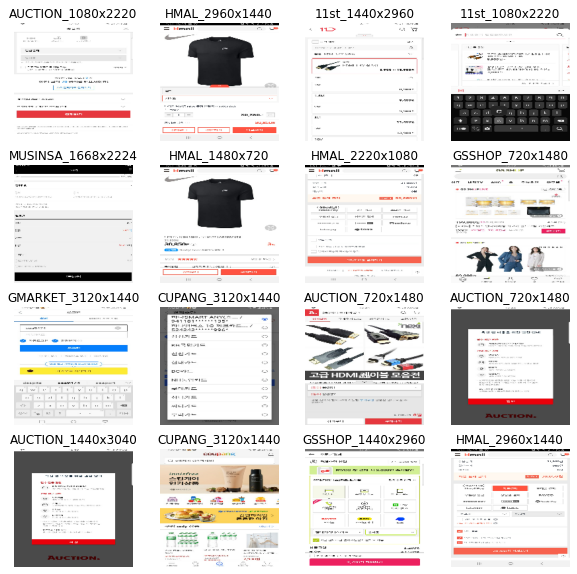

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [41]:
data_augmentation = tf.keras.Sequential(
  [
#    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
#    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

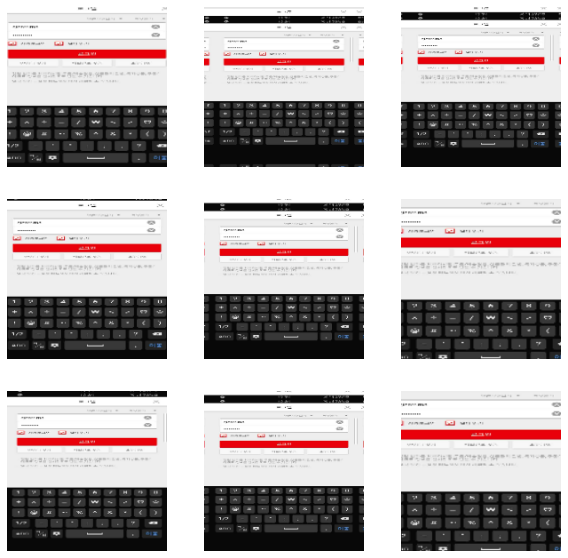

In [42]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [43]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [44]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [45]:
epochs = 100

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

Epoch 1/100
15/15 [==============================] - 1s 31ms/step - loss: 3.9480 - accuracy: 0.0218 - val_loss: 3.3943 - val_accuracy: 0.0351
Epoch 2/100
15/15 [==============================] - 0s 20ms/step - loss: 3.3799 - accuracy: 0.0566 - val_loss: 3.3020 - val_accuracy: 0.0351
Epoch 3/100
15/15 [==============================] - 0s 20ms/step - loss: 3.2527 - accuracy: 0.0588 - val_loss: 3.2795 - val_accuracy: 0.0702
Epoch 4/100
15/15 [==============================] - 0s 20ms/step - loss: 3.0557 - accuracy: 0.1111 - val_loss: 3.3224 - val_accuracy: 0.0789
Epoch 5/100
15/15 [==============================] - 0s 20ms/step - loss: 2.9037 - accuracy: 0.1808 - val_loss: 3.0080 - val_accuracy: 0.1228
Epoch 6/100
15/15 [==============================] - 0s 20ms/step - loss: 2.6003 - accuracy: 0.2200 - val_loss: 3.0070 - val_accuracy: 0.0965
Epoch 7/100
15/15 [==============================] - 0s 20ms/step - loss: 2.4034 - accuracy: 0.2397 - val_loss: 3.1759 - val_accuracy: 0.1140
Epoch 

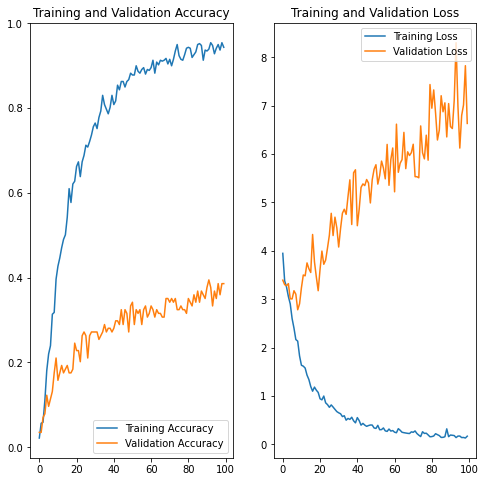

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

GSSHOP_1440x3040


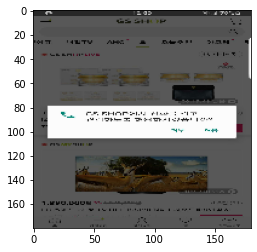

In [25]:
index = 1
plt.imshow(image_batch[index].numpy().astype("uint8"))
print(class_names[labels_batch[index].numpy().astype("uint32")])


This image most likely belongs to GSSHOP_1440x2960 with a 100.00 percent confidence.


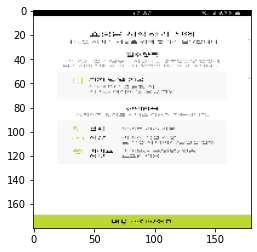

In [26]:
test_path = "/content/gdrive/MyDrive/data/GSSHOP_1440x2960/0001.jpg"
img = tf.keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
plt.imshow(img)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)